# CEO Salary vs Performance

## Research Question

Are there any relationships/trends in CEO salaries of top publicly traded US companies and their performance as indicated by company stock price, especially as it relates to how much they earn in relation to the average employee? 

Region : United States
Domain : Finance

## Resources 
For this study I used datasets two publicly available datatsets from the following URLs:
1. ceo_data_pay_merged_sp500.csv (CEO vs average worker salary for 2022-23) : https://www.kaggle.com/datasets/salimwid/latest-top-3000-companies-ceo-salary-202223
2. SP_data_from_2020-01-01_to_2022-04-04.xlsx (S&P 500 Stock Price Data from 2019-2022) : https://365financialanalyst.com/data/sp500/

Disclaimer: The data obtained from these public souces have not been verified and any conclusions drawn from this analysis should be taken with a grain of salt.

The data from these frames is then pre-processed and the resulting dataframes are saved in df_ceo.pkl and df_stocks.pkl. Commented code to perform the data pre-processing are avavilable below.

## Methodology 
The analysis was limited to S&P 500 companies. Change in stock price was used an indicator of CEO performance. This notebook creates a widget where one can select a range of dates to calculate stock price change across a given period and then compare it against the CEO to average employee salaries using a bubble plot. The color of the bubbles are used to represent the industry which the company belongs to and the size of the bubbles is proportional to the CEO salary. Capability to a select specific range of percentiles for stock price change (x-axis of plot) and CEO to worker salary ratio (y-axis of plot) are added to easily filter the data to identify and remove or keep outliers as needed. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

import re

First, the CEO salary data is read from ceo_data_pay_merged_sp500.csv, cleaned up and stored in the **df_ceo** dataframe below. Although the year is not clearly indicated, the URL would indicate that this data is for the 2022-23 Financial year.  

In [2]:
# Code to preprocess CEO and employee salaries

# # Read data for CEO and employee salaries
# df_ceo = pd.read_csv("OriginalData/ceo_data_pay_merged_sp500.csv")

# # Clean up the CEO dataframe
# df_ceo.drop(columns="Unnamed: 0",inplace=True)
# df_ceo['ticker'] = df_ceo['ticker'].astype("string")
# df_ceo['company_name'] = df_ceo['company_name'].astype("string")
# df_ceo['median_worker_pay'] = df_ceo['median_worker_pay'].apply(lambda x: re.sub(r'[\$\,]','',x))
# df_ceo['median_worker_pay'] = df_ceo['median_worker_pay'].astype("int64")
# df_ceo['ceo_name'] = df_ceo['ceo_name'].astype("string")
# df_ceo['salary'] = df_ceo['salary'].apply(lambda x: re.sub(r'[\$\,]','',x))
# df_ceo['salary'] = df_ceo['salary'].astype("int64")
# df_ceo.rename(columns={"salary":"ceo_salary"},inplace=True)
# df_ceo['salary_ratio'] = df_ceo['ceo_salary']/df_ceo['median_worker_pay'] #Reclculate salary ratio as a float
# df_ceo['industry'] = df_ceo['industry'].apply(lambda x: re.sub(r'\%20',' ',x))
# df_ceo['industry'] = df_ceo['industry'].astype("string")
# df_ceo.set_index("ticker",inplace=True)
# df_ceo.to_pickle("df_ceo.pkl")

In [3]:
df_ceo = pd.read_pickle("df_ceo.pkl")
df_ceo.head()

,company_name,median_worker_pay,pay_ratio,ceo_name,ceo_salary,industry,salary_ratio
ticker,,,,,,,
ATVI,"Activision Blizzard, Inc.",117207,7:1,Robert Kotick,826549,Communication Services,7.052045
CHTR,"Charter Communications, Inc.",60007,698:1,Thomas Rutledge,41860263,Communication Services,697.589665
CMCSA,Comcast Corporation,83840,405:1,Brian Roberts,33978581,Communication Services,405.278876
DIS,The Walt Disney Company,50430,644:1,Robert Chapek,32464293,Communication Services,643.749613
DISCA,"Warner Bros. Discovery, Inc.",82964,"2,972:1",David Zaslav,246573481,Communication Services,2972.053915


Next the Stock Prices for S&P 500 are read from SP_data_from_2020-01-01_to_2022-04-04.xlsx, cleaned up and saved in the **df_stocks** dataframe below. Since the time scales I am analyzing are over months, I just used the opening prices for the day. Missing data for unavailable days and stocks are dropped. The ticker symbols are extracted from the column names, whcih are then replaced with these ticker symbols, so that we can compare  

In [4]:
# Code to preprocess stock prices

# # Read data for recent S&P 500 stock prices (Daily price on Market Open)
# df_stocks = pd.read_excel('OriginalData/SP_data_from_2020-01-01_to_2022-04-04.xlsx', sheet_name='Open')

# # Drop missing columns and dates
# df_stocks.dropna(axis=1,how='all',inplace=True)
# df_stocks.dropna(axis=0,how='any',inplace=True)

# # Set Date as Index
# df_stocks.rename(columns={0:"Date"},inplace=True)
# df_stocks.set_index("Date",inplace=True)

# # Replace - with . and find ticker symbols in column names
# col_tickers = [ re.sub(r'-',r'.',x) for x in df_stocks.columns]
# col_tickers = [ re.findall(r'(?<=\()[\w\.]*(?=\))',x)[0] for x in col_tickers]

# # Replace column Names with ticker Symbols
# column_dict = dict(zip(df_stocks.columns.to_list(),col_tickers))
# df_stocks.rename(columns=column_dict,inplace=True)

# # Check for missing tickers 
# missing_tickers = []
# for ticker in df_ceo.index:
#     if ticker not in df_stocks.columns:
#         missing_tickers.append(ticker)
# df_stocks.to_pickle("df_stocks.pkl")

In [5]:
df_stocks = pd.read_pickle("df_stocks.pkl")
df_stocks.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-19,128.603977,78.934589,62.672302,142.410004,147.336642,54.990326,291.769989,39.560001,83.973929,8.963532,...,41.150002,59.501096,14.167068,71.893406,63.316536,57.385827,181.860001,76.961685,25.798031,103.763720
2020-03-20,128.940175,71.842510,66.209522,142.130005,153.342603,54.624517,312.920013,41.509998,83.983632,10.576967,...,49.830002,57.054514,16.021955,76.750265,63.140600,61.785273,186.070007,86.470896,26.239024,100.402155
2020-03-23,119.685443,65.070581,61.112294,132.389999,144.075674,52.212142,296.670013,40.619999,72.797470,11.303484,...,53.509998,48.834797,14.633029,71.626323,57.852819,55.224700,179.850006,80.876116,24.829769,97.940301
2020-03-24,114.203605,62.974977,61.819745,136.389999,148.212707,57.679540,322.959991,44.040001,80.313177,11.935649,...,68.660004,49.589080,15.663525,74.702658,57.325017,59.768864,180.089996,81.754493,24.197039,97.594245
2020-03-25,124.345474,66.894526,61.602067,144.009995,152.281597,54.387234,308.000000,46.790001,84.799300,12.030003,...,71.809998,51.581151,15.851703,75.088443,60.042213,67.931017,180.029999,88.638168,24.350430,101.489719


The **get_plot_data** function below uses the **df_ceo** and **df_stocks** dataframes defined above to generate a **df_plot** dataframe which is a filtered  (based on percentiles) version of the **df_ceo** dataframe with an added column *'price change (%)'* which contains change in stock price from *from_date* to *to_date*, which are also outputs alongwith **df_plot**. The inputs to **get_plot_data** are requested date range (*from_date_in*, *to_date_in*), the precentile of price changes (%) to keep (*low_perc_x*,*high_perc_x*), an additional category for filtering based on some column of df_ceo (*ycol*) which is usually *salary_ratio* and the percentile range of this selected column (*low_perc_y*,*high_perc_y*).

In [6]:
# Find change of stock prices between given dates 
def get_plot_data(from_date_in,to_date_in,low_perc_x,high_perc_x,ycol,low_perc_y,high_perc_y):
    # Get available stock price info between given dates
    df_price = df_stocks.loc[from_date_in:to_date_in]
    
    # Calculate Series of stock price change % between given dates
    price_change_perc  = (df_price.iloc[-1] - df_price.iloc[0])*100/df_price.iloc[0]
    price_change_perc.rename(index="price change (%)",inplace=True)

    # Create dataframe with plot info by merging CEO data with stockprice change data
    df_plot = df_ceo
    df_plot = df_plot.merge(price_change_perc, left_index=True,right_index=True)
    
    # Filter the plot info by percentile limits
    df_plot = df_plot[(df_plot["price change (%)"] >= df_plot["price change (%)"].quantile(low_perc_x/100)) & (df_plot["price change (%)"] <= df_plot["price change (%)"].quantile(high_perc_x/100)) ]
    df_plot = df_plot[(df_plot[ycol] >= df_plot[ycol].quantile(low_perc_y)) & (df_plot[ycol] <= df_plot[ycol].quantile(high_perc_y/100)) ]
    from_date = df_price.index[0]
    to_date = df_price.index[-1]
    return df_plot, from_date, to_date


Next, the change in stock price is plotted against CEO to worker salary ratio is plotted on a bubble plot for the entire dataset.  

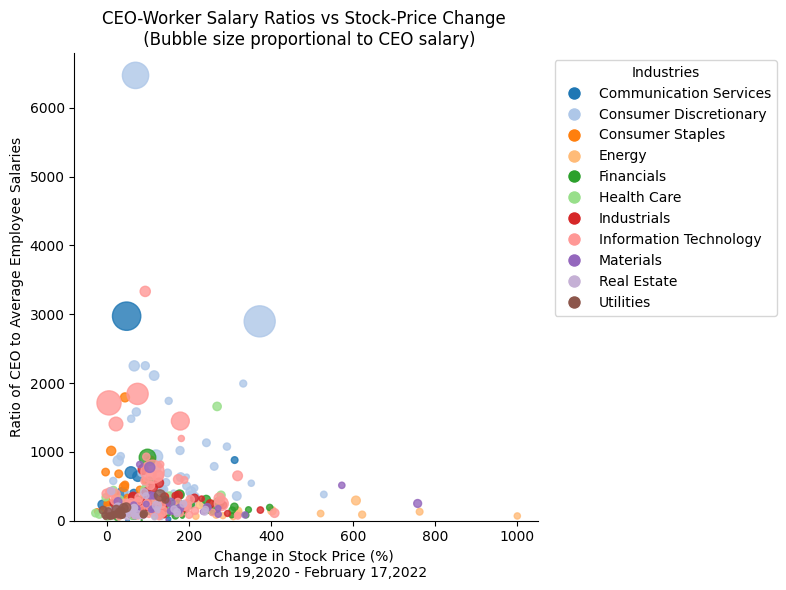

In [7]:
# Generate plot data. Use salary_ratio as the y-axis column. From and to dates are the entire range and all percentiles are 0-100. 
ycol = "salary_ratio"
ylab = "Ratio of CEO to Average Employee Salaries"
df_plot, from_date, to_date = get_plot_data(df_stocks.index[0],df_stocks.index[-1],0,100,ycol,0,100)

# Get list of industries for the companies 
industries = list(df_plot.industry.unique())

# Get the colors and radii of the bubbles that need to be plotted
data_radii = []
data_colors= []
cmap = mpl.cm.tab20
scale_salary = 2000
max_ceo_salary = df_plot["ceo_salary"].max()
for i in range(len(df_plot["price change (%)"])):
    rp = scale_salary*df_plot["ceo_salary"][i]/max_ceo_salary
    category = industries.index(df_plot["industry"][i])
    cp = cmap(category)
    data_colors.append(cp)
    data_radii.append(rp)

# Create Legend
legend_circles = []
for i in range(len(industries)):
    legend_circles.append(plt.Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor=cmap(i), markersize=10))
# Plot Figure    
fig = plt.figure(1,figsize=(8,6))
ax = plt.gca()
plt.scatter(df_plot["price change (%)"], df_plot[ycol], s=data_radii, marker = '.',color = data_colors, alpha = 0.8)
plt.xlabel('Change in Stock Price (%) \n {0} - {1} '.format(from_date.strftime("%B %d,%Y"),to_date.strftime("%B %d,%Y")))
plt.ylabel(ylab)
ax.set_ylim(bottom=0)
ax.set_title("CEO-Worker Salary Ratios vs Stock-Price Change \n (Bubble size proportional to CEO salary)")
ax.legend(legend_circles,industries,bbox_to_anchor=(1.02, 1.0), loc='upper left',title = "Industries")
ax.spines[['right', 'top']].set_visible(False)
fig.tight_layout()

## Analysis of the entire dataset
One may see that there are definite outliers. Near the left-top are the worst performing CEOs who have much higher salaries than workers, but have not successfully enacted gains in stock-prices. They seem to be concentrated in Consumer discretionary, Comm Services and IT industried. Toward the bottom right are high performing CEOs who seem to have enacted high stock price gains while receiving (relatively) modest salaries. The Energy sector seems like it is home to such CEOs. We also see that the worst-performing CEOs also tend to have high salaries in absolute terms (indicated by the size of the bubbles). 

However, this data may be skewed as we are also looking at stock prices across 2 years. It may make sense to look at stock prices across different time-periods and also filter the x and y axes. The highest values on x and y axes also seem too extreme and it might make sense to filter out the outliers to see if there is any trend in the majority of datapoints.

## Widget description
A widget is created in the next section to allow the user to do this. There are range sliders for Percentile Price Change, Percentile salary ratio to filter the axes and a range slider to select the date range across which the % stock price change is calculated. There is also a slider to adjust the size of the bubbles by changing the scaling for CEO Salary that is used to calculate the radii of the bubbles.

In [8]:
# Widget for selection of percentiles and date ranges 
style = {'description_width': '150px'}
@interact(
    x_perc=widgets.IntRangeSlider(
        value=[0, 90],
        min=0,
        max=100,
        step=2,
        style=style,
        layout={'width': '800px'},
        description='Percentile Price Change',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True), 
    y_perc=widgets.IntRangeSlider(
        value=[0, 90],
        min=0,
        max=100,
        step=2,
        style=style,
        layout={'width': '800px'},
        description='Percentile Salary Ratio',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True),
    date_range = widgets.SelectionRangeSlider(
        options=  [(i.strftime('%m-%Y'), i) for i in df_stocks.index],
        index=(378, len(df_stocks.index)-1),
        style=style,
        layout={'width': '800px'},
        description='Date Range',
        disabled=False),
    scale_salary = widgets.IntSlider(
        value=3001,
        min=1,
        max=5001,
        step=100,
        style=style,
        layout={'width': '800px'},
        description ='CEO Salary Scaling',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'))
def plot_fun(x_perc,y_perc,date_range,scale_salary):
    ycol = "salary_ratio"
    ylab = "Ratio of CEO to Average Employee Salaries"

    df_plot, from_date, to_date = get_plot_data(date_range[0],date_range[1],x_perc[0],x_perc[1],ycol,y_perc[0],y_perc[1])
   
    data_radii = []
    data_colors= []
    cmap = mpl.cm.tab20
    max_ceo_salary = df_plot["ceo_salary"].max()

    for i in range(len(df_plot["price change (%)"])):
        xp = df_plot["price change (%)"][i]
        yp = df_plot[ycol][i]
        rp = scale_salary*df_plot["ceo_salary"][i]/max_ceo_salary
        category = industries.index(df_plot["industry"][i])
        cp = cmap(category)
        data_colors.append(cp)
        data_radii.append(rp)

    fig = plt.figure(figsize=(8,6))
    ax = plt.gca()
    plt.scatter(df_plot["price change (%)"], df_plot[ycol], s=data_radii, marker = '.',color = data_colors, alpha = 0.8)
    plt.xlabel('Change in Stock Price (%) \n {0} - {1} '.format(from_date.strftime("%B %d,%Y"),to_date.strftime("%B %d,%Y")))
    plt.ylabel(ylab)
    ax.set_title("CEO-Worker Salary Ratios vs Stock-Price Change \n (Bubble size proportional to CEO salary)")
    ax.set_ylim(bottom=0)
    ax.legend(legend_circles,industries,bbox_to_anchor=(1.02, 1.0), loc='upper left', title = "Industries")
    ax.spines[['right', 'top']].set_visible(False)
    fig.tight_layout()

interactive(children=(IntRangeSlider(value=(0, 90), continuous_update=False, description='Percentile Price Cha…

## Analysis of the filtered dataset
The defaults of the widget were set to look at data only from the last 6 months of available data and from 0-90<sup>th</sup> percentile along both the x and y axes. It is seen that in this data slice which contains the majority of cases, it may not be possible to establish a clear trend between ceo salaries and stock price change as the cases seem to be evenly distributed along both axes (decrease the CEO salary scaling to confirm). However, we do see that it is possible to identify outliers and the worst performing CEOs seem to be paid indordinately more both in absolute terms and compared to the average worker. 

## Caveats
There are many caveats to this analysis. There are more indicators to CEO performance than just the stock price of a company. Also no data was included regarding when the CEOs joined the companies. The data sources are also unverified. A longer timescale may also be needed to judge performance.